In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools 


In [4]:
dataset = pd.read_csv('final_dataset.csv')

In [5]:
playing_stat_test = dataset[5700:] 
playing_stat_test.to_csv = ('test_set.csv')

In [6]:
print (dataset.head())
print(dataset.keys())

   Unnamed: 0      Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  \
0           0  19/08/00  Charlton       Man City     4     0   H     0     0   
1           1  19/08/00   Chelsea       West Ham     4     2   H     0     0   
2           2  19/08/00  Coventry  Middlesbrough     1     3  NH     0     0   
3           3  19/08/00     Derby    Southampton     2     2  NH     0     0   
4           4  19/08/00     Leeds        Everton     2     0   H     0     0   

   HTGC  ...  HTLossStreak3  HTLossStreak5  ATWinStreak3 ATWinStreak5  \
0     0  ...              0              0             0            0   
1     0  ...              0              0             0            0   
2     0  ...              0              0             0            0   
3     0  ...              0              0             0            0   
4     0  ...              0              0             0            0   

  ATLossStreak3 ATLossStreak5 HTGD ATGD DiffPts DiffFormPts  
0             0   

In [7]:
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

print (dataset2.keys())
print (dataset2.head(10))

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')
   Unnamed: 0 FTR  HTP  ATP HM1 HM2 HM3 AM1 AM2 AM3  HTGD  ATGD  DiffFormPts
0           0   H  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
1           1   H  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
2           2  NH  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
3           3  NH  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
4           4   H  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
5           5  NH  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
6           6   H  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
7           7   H  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
8           8   H  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0
9           9   H  0.0  0.0   M   M   M   M   M   M   0.0   0.0          0.0


In [8]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))


Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3176
Win rate of home team: 46.43%


array([[<AxesSubplot:xlabel='HTGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='ATGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTP'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTP'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATP'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATP'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATP'>,
     

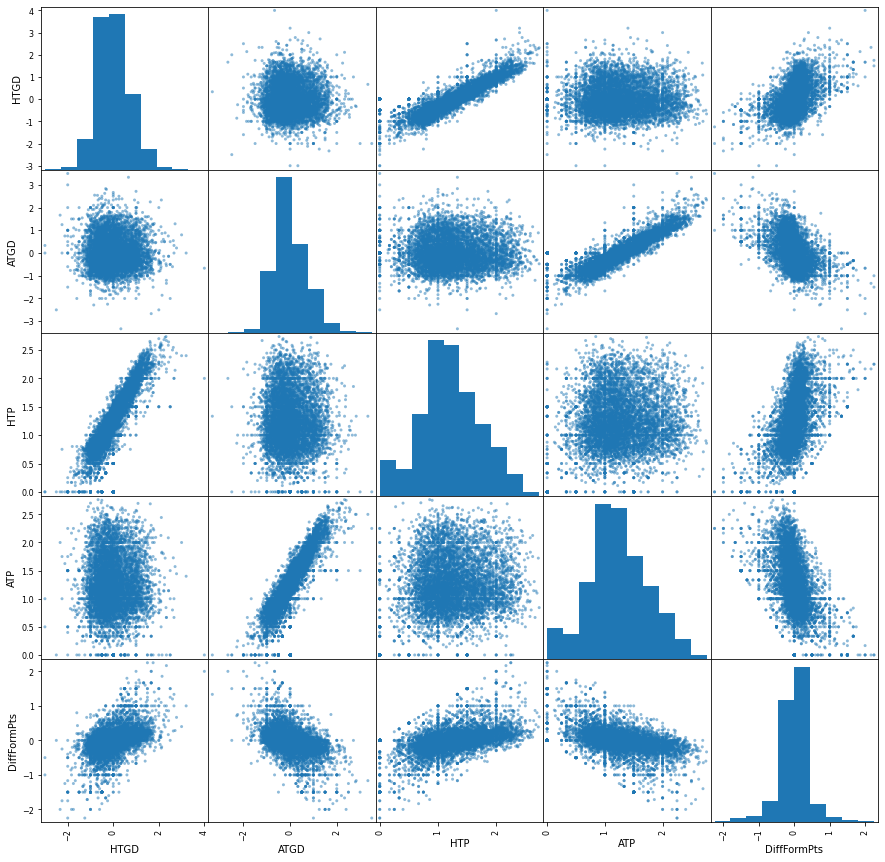

In [9]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [11]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)

X_all = dataset2.drop(columns=['FTR'])
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')


def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

# Investigate each feature column for the data
    for col, col_data in X.items():  # Use X.items() instead of X.iteritems()
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output


X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))


Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [12]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)


In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
Y_pred = classifier.predict(X_test)

<AxesSubplot:>

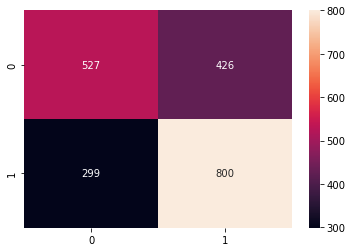

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True,fmt='d')

In [16]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.64      0.55      0.59       953
          NH       0.65      0.73      0.69      1099

    accuracy                           0.65      2052
   macro avg       0.65      0.64      0.64      2052
weighted avg       0.65      0.65      0.64      2052

